This notebook will be mainly used for the capstone project.

# 1. Introduction

## 1.1 Background

Motor vehicles accidents in the United States continue to affect the lives hundreds of thousands of people - not only victims themselves but also their families and loved ones. According to data published by the National Highway Traffic Safety Administration, average fatality from vehicle accidents from 2014 to 2018, 36,013, is actually lower than that of from 1995 to 1999, 41,822. Make no mistake, that is still a high figure. The statistic shows even with advent of technology aimed to produce safer cars and tougher drivers' license requirements, tragic car accidents inflict so much pain both mentally and physically. Then what exactly causes fatalities and injuries in car accidents and to what extent does that cause(s) affect the severity of an accident? 

In reality, there are so many variables that affect severity - number of people involved, presence of pedestrians and motorcyclists, direction from which car came from, the speed of car before accident, and so many more. Therefore, when emergency responders are on site of accident, it is practically impossible to communicate all information regarding the situation with every single detail, especially when few seconds can be the difference between life and death. A prediction that summarizes all of these variables into a single metric would not only guide emergency responders and medical staff to make more informed and better decisions on treatment but also in the long run give policy makers a better idea about formulating legislation that aims to eliminate possible factors contributing to severity of accidents.

## 1.2 Problem

This project aims to develop a program that predicts the severity of an accident based on data collected by local authorities and will focus on data from Seattle, Washington.

## 1.3 Interest

The groups of people that benefit greatly from severity predictions would be: a) emergency responders and emergency room staff (doctors and nurses) because the prediction would provide general guidance on treatment approaches, and b) policy makers because they can reference in which conditions severity increased and accordingly pass legislation for traffic regulations, safer infrastructure, and other safety measures. 

# 2. Data


## 2.1 Data Source

The data is on accidents collected on Seattle, Washington, which was obtained from [here.](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data/)

## 2.2 Data Cleaning

There were some problems that needed to be addressed within the dataset. First, some instances contained not enough information in order to reach a meaningful severity prediction. For example, EXCEPTRSNCODE entry value of instance of OBJECTID 421 is 'NEI', abbreviation for 'not enough information.' PERSONCOUNT,  PEDCOUNT, PEDCYLCOUNT, and VEHCOUNT for this instance were all 0. Thus, instances like that of OBJECTID 421 were discarded from the data. 

On the other hand, however, there were instances whose at least one entry value for PERSONCOUNT,  PEDCOUNT, PEDCYLCOUNT, and VEHCOUNT was non-zero, but description of collision conveyed by ST_COLDESC was not logically consistent with the four aforementioned features. A notable example of such instance is that of OBJEICD 328 and 329. ST_COLDESC of both instances describe a motor vehicle colliding with another motor vehicle, but VEHCOUNT were 0 for both of them. Instances of OBJECTID 328, 329, and 421 all share a common trait: their STATUS entry values were 'Unmatched'. It was to this premise that I decided to drop all instances of STATUS 'Unmatched.' 

However, doing so did not completely eliminate all instances described above. Consequently, I also dropped instances of EXCEPTRSNCODE 'NEI' and of SDOT_COLDESC 'NOT ENOUGH INFORMATION / NOT APPLICABLE'. After cleaning the data, I was left with 185242 instances. 

## 2.3 Feature Selection

The cleaned data contains 40 features. First, I took the liberty of dropping features that were left blank - most notably EXCEPTRSNCODE and EXCEPTRSNDESC. These two features, at its raw form, were initially not empty.

Second, features that contributed little or none at all in predicting severity were dropped. There were few general categories of such features. One of which is unique codes assigned by state authorities according to their guidelines. Some features that fell into this categories were: OBJECTID, SHAPE, STATUS, COLDETKEY, REPORTNO, SEGLANEKEY, CROSSWALKKEY, INCKEY, and INTKEY, and SDOTCOLNUM.

Another category was features that described circumstances not directly pertinent to accidents themselves. Features comprising this category were: LOCATION, ADDRTYPE, X,and Y (which are respectively the longitude and the latitude of accidents).

The final category was features whose information was redundant. Those were INCDATE and INCDTTM. My initial assumptions after looking through were that precipitation (such as rain, snow, and sleet) and amount of light (bright, cloudy, dark, etc) would contribute to severity and that therefore I would need to gather weather data. However, upon further inspection, I realized that such information were conveyed by WEATHER, ROADCOND, and LIGHTCOND. Another set of features were redundant. SDOT_COLCODE, SDOT_COLDESC, ST_COLCODE, and ST_COLDESC. The SDOT features more or less convey the same information as their ST counterparts, except that they use different labels. After comparing SDOT and ST features, I concluded that SDOT features offered entry values that were more favorable to data analysis. Therefore, ST features were dropped. Also, COLLISIONTYPE also contains overlapping information so it was dropped as well. SEVERITYDESC, which simply describe what the entry values of SEVERITYCODE mean, essentially overlaps with SEVERITYCODE, so it was also dropped. Also, INJURIES, SERIOUSINJURIES, and FATALITIES collide with SEVERITYCODE, for SEVERITYCODE in fact reflects whether there were any fatalities and injuries. 

Just to make sure I went through the data if there were any more features I could eliminate. Noticing that COLLISIONTYPE and HITPARKEDCAR conveyed similar information, I cross-referenced the two features to see if there were any inconsistencies and immediately noticed there were. For example, instances of OBJECTID 23 and 24 involved parked cars, but their HITPARKEDCAR entry values are both 'N'. Therefore, without much futher inspection, I decided to drop HITPARKEDCAR. 

After dropping features according to the procedure outlined above, following features remained: SEVERITYCODE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SPEEDING, INJURIES, SERIOUSINJURIES, and FATALITIES.

I will be developing classification models in this project to predict severity of an accident, meaning that SEVERITYCODE will be my target variable. Not all features will be actively used in the data analysis procedure. It must be noted that SDOT_COLCODE is not a numerical variable, but a categorical variable. As a result, I will use One Hot Encoding technique to convert SDOT_COLCODE to a numerical variable, which is more easily digestible for analysis. All features other than the aforementioned target variables will be used in regression and classification models. 

# 3. Methodology

The overall direction of this project will be figuring out which set of parameters for the classification models will result in maximum accuracies - i.e. which k-value for K-Nearest Neighbors, what depth for decision tree classifier, and what solver and what multi-classifier parameter in logistic regresssion, and which kernel for SVM. Numerous features in the dataset are not numerical variables, which is not appropriate for classification models used in this report. I will use One Hot Encoding Technique to quantify those features. 

# 4. Analysis

In [2]:
import pandas as pd
import numpy as np
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [3]:
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [3]:
df = pd.read_csv('http://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv')
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


In [46]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS',
       'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC',
       'SEVERITYCODE', 'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT',
       'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES',
       'FATALITIES', 'INCDATE', 'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE',
       'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [19]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [4]:
df = df.drop(df[df.STATUS == 'Unmatched'].index)

In [5]:
df = df.drop(df[df.EXCEPTRSNCODE == 'NEI'].index)

In [6]:
df = df.drop(df[df.SDOT_COLDESC == 'NOT ENOUGH INFORMATION / NOT APPLICABLE'].index)

SEVERITYCODE, PERSONCOUNT, PEDCOUNT, PEDCYLCOUNT, VEHCOUNT, SDOT_COLCODE, SDOT_COLDESC, INATTENTIONIND, UNDERINFL, WEATHER, ROADCOND, LIGHTCOND, PEDROWNOTGRNT, SPEEDING, INJURIES, SERIOUSINJURIES, and FATALITIES

In [8]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,INATTENTIONIND,UNDERINFL,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,INJURIES,SERIOUSINJURIES,FATALITIES
0,1,2,0,0,2,11.0,NaN,N,Dry,Daylight,NaN,NaN,0,0,0
1,1,2,0,0,2,14.0,Y,0,Wet,Dusk,NaN,NaN,0,0,0
2,2,2,0,0,2,11.0,NaN,N,Dry,Dark - Street Lights On,NaN,NaN,1,0,0
3,2,3,1,0,1,24.0,NaN,N,Wet,Dark - Street Lights On,NaN,NaN,1,0,0
4,2,2,0,0,1,28.0,NaN,0,Ice,Dark - Street Lights On,NaN,Y,1,0,0


In [7]:
df.fillna(0, inplace = True)
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,0,0.0,0,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,0.0,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,0,5101020.0,0,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,0.0,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,0,0.0,0,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,0,0.0,0,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,0.0,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,0,9359012.0,Y,50,Fixed object,0,0,N


In [8]:
df_select = df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT',
                'SDOT_COLCODE','INATTENTIONIND','UNDERINFL', 'ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING',
                'INJURIES', 'SERIOUSINJURIES','FATALITIES']]

### One Hot Encoding for SDOT_COLCODE 

In [9]:
df_select = pd.concat([df_select,pd.get_dummies(df_select['SDOT_COLCODE'])], axis=1)
df_select.drop(['SDOT_COLCODE'], axis = 1,inplace=True)
df_select.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,...,54.0,55.0,56.0,58.0,61.0,64.0,66.0,68.0,69.0,87.0
0,1,2,0,0,2,0,N,Dry,Daylight,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,0,2,Y,0,Wet,Dusk,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,0,0,2,0,N,Dry,Dark - Street Lights On,0,...,0,0,0,0,0,0,0,0,0,0
3,2,3,1,0,1,0,N,Wet,Dark - Street Lights On,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,0,0,1,0,0,Ice,Dark - Street Lights On,0,...,0,0,0,0,0,0,0,0,0,0


### One Hot Encoding for ROADCOND 

In [10]:
df_select = pd.concat([df_select,pd.get_dummies(df_select['ROADCOND'])], axis=1)
df_select.drop(['ROADCOND'], axis = 1,inplace=True)
df_select.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,...,0,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet
0,1,2,0,0,2,0,N,Daylight,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,2,0,0,2,Y,0,Dusk,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2,2,0,0,2,0,N,Dark - Street Lights On,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2,3,1,0,1,0,N,Dark - Street Lights On,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,2,0,0,1,0,0,Dark - Street Lights On,0,Y,...,0,0,1,0,0,0,0,0,0,0


### One Hot Encoding for LIGHTCOND 

In [11]:
df_select = pd.concat([df_select,pd.get_dummies(df_select['LIGHTCOND'])], axis=1)
df_select.drop(['LIGHTCOND'], axis = 1,inplace=True)
df_select.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,INJURIES,...,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,1,2,0,0,2,0,N,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,2,0,0,2,Y,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2,0,0,2,0,N,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,2,3,1,0,1,0,N,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,2,2,0,0,1,0,0,0,Y,1,...,0,0,0,1,0,0,0,0,0,0


### Quantifying INATTENTIONIND 

In [12]:
df_select.INATTENTIONIND.value_counts()

0    155938
Y     29304
Name: INATTENTIONIND, dtype: int64

In [13]:
df_select.INATTENTIONIND = df_select.INATTENTIONIND.replace('Y', 1)
df_select.INATTENTIONIND.value_counts()

0    155938
1     29304
Name: INATTENTIONIND, dtype: int64

### Quantifying UNDERINFL

In [14]:
df_select.UNDERINFL.value_counts()

N    95954
0    79818
Y     5265
1     4200
0        5
Name: UNDERINFL, dtype: int64

In [15]:
df_select.UNDERINFL = df_select.UNDERINFL.replace(['N','Y'], [0, 1])
df_select.UNDERINFL.value_counts()

0    95959
0    79818
1     5265
1     4200
Name: UNDERINFL, dtype: int64

In [16]:
df_select.UNDERINFL = df_select.UNDERINFL.astype(int)

In [17]:
df_select.UNDERINFL.value_counts()

0    175777
1      9465
Name: UNDERINFL, dtype: int64

### Quantifying PEDROWNOTGRNT

In [18]:
df_select.PEDROWNOTGRNT.value_counts()

0    180134
Y      5108
Name: PEDROWNOTGRNT, dtype: int64

In [19]:
df_select.PEDROWNOTGRNT = df_select.PEDROWNOTGRNT.replace('Y', 1)
df_select.PEDROWNOTGRNT.value_counts()

0    180134
1      5108
Name: PEDROWNOTGRNT, dtype: int64

### Quantifying SPEEDING

In [20]:
df_select.SPEEDING.value_counts()

0    175483
Y      9759
Name: SPEEDING, dtype: int64

In [21]:
df_select.SPEEDING = df_select.SPEEDING.replace('Y', 1)
df_select.SPEEDING.value_counts()

0    175483
1      9759
Name: SPEEDING, dtype: int64

In [22]:
df_select.columns

Index([            'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                 'INJURIES',
                'SERIOUSINJURIES',               'FATALITIES',
                              0.0,                       11.0,
                             12.0,                       13.0,
                             14.0,                       15.0,
                             16.0,                       18.0,
                             21.0,                       22.0,
                             23.0,                       24.0,
                             25.0,                       26.0,
                             27.0,                       28.0,
                             29.0,                       31.0,
                             32.0,                     

# Constructing Classification Model

## Balancing Dataset with respect to SEVERITYCODE

In [22]:
df_select.SEVERITYCODE.value_counts()

1     124675
2      57202
2b      3021
3        337
0          6
0          1
Name: SEVERITYCODE, dtype: int64

In [23]:
df_select.SEVERITYCODE = df_select.SEVERITYCODE.astype(str)
df_select.SEVERITYCODE.value_counts()

1     124675
2      57202
2b      3021
3        337
0          7
Name: SEVERITYCODE, dtype: int64

In [24]:
#Upsampling SEVERITYCODE = 0
df_SEVCODE_0 = df_select[df_select.SEVERITYCODE == '0']
df_SC_0 = resample(df_SEVCODE_0, replace = True,  n_samples = 5000, random_state = 123)

# Downsampling SEVERITYCODE = 1
df_SEVCODE_1 = df_select[df_select.SEVERITYCODE == '1']
df_SC_1 = resample(df_SEVCODE_1, replace =False,  n_samples= 5000, random_state=123)

# Downsampling SEVERITYCODE = 2
df_SEVCODE_2 = df_select[df_select.SEVERITYCODE == '2']
df_SC_2 = resample(df_SEVCODE_2, replace =False,  n_samples= 5000, random_state=123)

#Upsampling SEVERITYCODE = 2b
df_SEVCODE_2b = df_select[df_select.SEVERITYCODE == '2b']
df_SC_2b = resample(df_SEVCODE_2b, replace = True,  n_samples = 5000, random_state = 123)

#Upsampling SEVERITYCODE = 3
df_SEVCODE_3 = df_select[df_select.SEVERITYCODE == '3']
df_SC_3 = resample(df_SEVCODE_3, replace = True,  n_samples = 5000, random_state = 123)

df_balanced = pd.concat([df_SC_0,df_SC_1,df_SC_2, df_SC_2b, df_SC_3])
df_balanced.SEVERITYCODE.value_counts()

2b    5000
1     5000
0     5000
2     5000
3     5000
Name: SEVERITYCODE, dtype: int64

In [25]:
df_balanced.head()

# Balancing Complete

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,INJURIES,...,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
209960,0,3,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
195398,0,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
209960,0,3,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
120677,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
127028,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [25]:
# Give the dataset some finishing touches

df_balanced.reset_index(inplace = True)
df_balanced.head()

,index,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,...,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,209960,0,3,2,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,195398,0,2,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,209960,0,3,2,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,120677,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,127028,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [26]:
df_balanced.drop(['index'], axis=1, inplace = True)
df_balanced.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,INJURIES,...,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown
0,0,3,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,2,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,3,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [27]:
df_balanced.columns

Index([            'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                 'INJURIES',
                'SERIOUSINJURIES',               'FATALITIES',
                              0.0,                       11.0,
                             12.0,                       13.0,
                             14.0,                       15.0,
                             16.0,                       18.0,
                             21.0,                       22.0,
                             23.0,                       24.0,
                             25.0,                       26.0,
                             27.0,                       28.0,
                             29.0,                       31.0,
                             32.0,                     

In [28]:
#Threr are two columns named 'Unknown'.

col = []
count = 1
for column in df_balanced.columns:
    if column == 'Unknown':
        col.append(f'Unknown_{count}')
        count+=1
    else:col.append(column)
df_balanced.columns = col
df_balanced.columns

Index([            'SEVERITYCODE',              'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                 'INJURIES',
                'SERIOUSINJURIES',               'FATALITIES',
                              0.0,                       11.0,
                             12.0,                       13.0,
                             14.0,                       15.0,
                             16.0,                       18.0,
                             21.0,                       22.0,
                             23.0,                       24.0,
                             25.0,                       26.0,
                             27.0,                       28.0,
                             29.0,                       31.0,
                             32.0,                     

In [31]:
# So now we are ready to split the dataset into X and y and train and test.

X = df_balanced[[   'PERSONCOUNT',
                       'PEDCOUNT',              'PEDCYLCOUNT',
                       'VEHCOUNT',           'INATTENTIONIND',
                      'UNDERINFL',            'PEDROWNOTGRNT',
                       'SPEEDING',                       11.0,                       12.0,
                             13.0,                       14.0,
                             15.0,                       16.0,
                             18.0,                       21.0,
                             22.0,                       23.0,
                             24.0,                       25.0,
                             26.0,                       27.0,
                             28.0,                       29.0,
                             31.0,                       32.0,
                             33.0,                       34.0,
                             35.0,                       36.0,
                             44.0,                       46.0,
                             47.0,                       48.0,
                             51.0,                       52.0,
                             53.0,                       54.0,
                             55.0,                       56.0,
                             58.0,                       61.0,
                             64.0,                       66.0,
                             68.0,                       69.0,
                             87.0,                      'Dry',
                            'Ice',                      'Oil',
                          'Other',            'Sand/Mud/Dirt',
                     'Snow/Slush',           'Standing Water',
                        'Unknown_1',                      'Wet',
        'Dark - No Street Lights', 'Dark - Street Lights Off',
        'Dark - Street Lights On',  'Dark - Unknown Lighting',
                           'Dawn',                 'Daylight',
                           'Dusk',                    'Other',
                        'Unknown_2']]

y_class = df_balanced[['SEVERITYCODE']]

# 'INJURIES', 'SERIOUSINJURIES', and 'FATALITIES' excluded from feature set because SEVERITYCODE reflects any fatalities and injuries of accident.

In [32]:
X_train, X_test, y_c_train, y_c_test = train_test_split(X, y_class, test_size = 0.25, random_state=4)
print ('Train set:', X_train.shape,  y_c_train.shape)
print ('Test set:', X_test.shape,  y_c_test.shape)

Train set: (18750, 67) (18750, 1)
Test set: (6250, 67) (6250, 1)


In [33]:
# Normalize data because we have varying scales - max PERSONCOUNT entry value is 93. 

df_balanced.PERSONCOUNT.value_counts()

2     11459
3      4590
0      3958
1      1696
4      1593
5       882
6       315
7       204
8       100
9        76
10       33
14       25
12       15
31       13
11       12
93       11
13        8
47        2
21        1
29        1
54        1
34        1
23        1
17        1
15        1
16        1
Name: PERSONCOUNT, dtype: int64

In [34]:
normalizer = preprocessing.Normalizer()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [35]:
print(X_train_norm)

[[0.60302269 0.         0.         ... 0.         0.         0.        ]
 [0.63245553 0.31622777 0.         ... 0.         0.         0.        ]
 [0.60302269 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.40824829 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.60302269 0.         0.         ... 0.         0.         0.        ]]


In [36]:
print(X_test_norm)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.72760688 0.         0.         ... 0.         0.         0.        ]
 [0.83405766 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.63960215 0.         0.         ... 0.         0.         0.        ]
 [0.66666667 0.33333333 0.         ... 0.         0.         0.        ]
 [0.37796447 0.         0.         ... 0.         0.         0.        ]]


Our four classification methods: 

1. K Nearest Neighbor(KNN) 
2. Decision Tree
3. Logistic Regression
4. Support Vector Machine


### 1. K-Nearest Neighbors

In [37]:
Ks = 15
accu = np.zeros(Ks-1)
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_norm,y_c_train)
    yhat = neigh.predict(X_test_norm)
    accu[n-1] = metrics.accuracy_score(y_c_test, yhat)

accu

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/_

array([0.60368, 0.59968, 0.61552, 0.61568, 0.6216 , 0.6192 , 0.63056,
       0.61904, 0.6272 , 0.62496, 0.62544, 0.6312 , 0.6224 , 0.62224])

K = 12 yields the greatest accuracy of 0.6312.

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':


Confusion matrix, without normalization
[[1284    0    0    0    0]
 [   0  853  260   77   85]
 [   3  486  365  171  166]
 [   6  282  195  396  363]
 [   0   63   49   99 1047]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.66901961 0.20392157 0.06039216 0.06666667]
 [0.00251889 0.40806045 0.30646516 0.14357683 0.13937867]
 [0.00483092 0.22705314 0.15700483 0.31884058 0.29227053]
 [0.         0.05007949 0.03895072 0.07869634 0.83227345]]


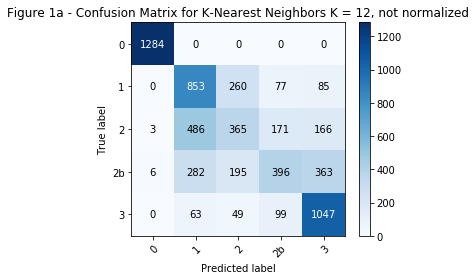

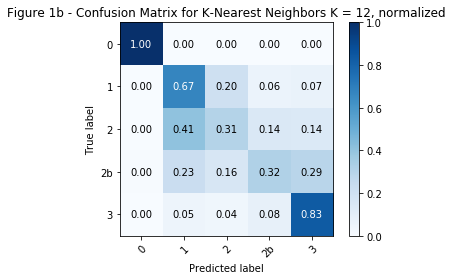

In [38]:
neigh = KNeighborsClassifier(n_neighbors = 12).fit(X_train_norm,y_c_train)
yhat = neigh.predict(X_test_norm)

# Version of sklearn installed in this Jupyter Notebook (0.20.3) does not include plot_confusion_matrix. The following code
# defining function 'plot_confusion_matrix' is not my work and is from this website: https://scikit-learn.org/0.20/auto_examples/model_selection/plot_confusion_matrix.html
# A similar version of the code is also found in the Logsitic Regression lab from Course 8: Machine Learning with Python of the IBM Data Science Professional Certificate.

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

matrices = [('Figure 1a - Confusion Matrix for K-Nearest Neighbors K = 12, not normalized', None), ('Figure 1b - Confusion Matrix for K-Nearest Neighbors K = 12, normalized', True)]

for title, norm in matrices:
    plot_confusion_matrix(y_c_test, yhat, classes = ['0', '1', '2', '2b', '3'], normalize = norm, title = title ) 
    

### 2. Decision Tree Classifier

In [39]:
depths = 50
DT_accu = np.zeros(depths - 1)
for n in range(1, depths):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = n).fit(X_train_norm, y_c_train)
    pred = DT.predict(X_test_norm)
    DT_accu[n-1] = metrics.accuracy_score(y_c_test, pred)
    
DT_accu

array([0.36272, 0.4784 , 0.53568, 0.55712, 0.58656, 0.59008, 0.5968 ,
       0.6048 , 0.61072, 0.61776, 0.62432, 0.63152, 0.63408, 0.63728,
       0.64144, 0.64384, 0.64336, 0.64704, 0.648  , 0.64736, 0.64928,
       0.64928, 0.64832, 0.64832, 0.64896, 0.6488 , 0.64928, 0.6488 ,
       0.64864, 0.64976, 0.64896, 0.64864, 0.6488 , 0.64848, 0.6496 ,
       0.64848, 0.64896, 0.64928, 0.64832, 0.6488 , 0.64832, 0.64864,
       0.64912, 0.6488 , 0.64864, 0.64944, 0.64864, 0.6488 , 0.64944])

Depth of 22 yields the maximum accuracy of 0.65008 for decision tree classifier.

Confusion matrix, without normalization
[[1284    0    0    0    0]
 [   0  823  305   81   66]
 [   0  433  441  173  144]
 [   3  228  252  442  317]
 [   0   55   44   86 1073]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         0.6454902  0.23921569 0.06352941 0.05176471]
 [0.         0.36356003 0.37027708 0.14525609 0.1209068 ]
 [0.00241546 0.18357488 0.20289855 0.35587762 0.25523349]
 [0.         0.04372019 0.03497615 0.06836248 0.85294118]]


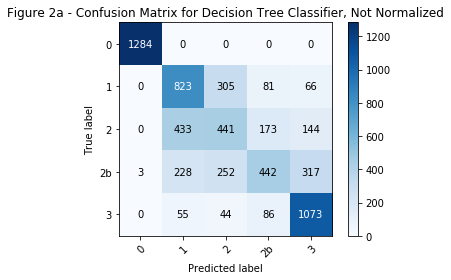

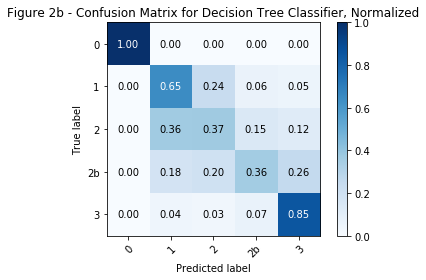

In [40]:
DT = DecisionTreeClassifier(criterion = 'entropy', max_depth = 22).fit(X_train_norm, y_c_train)
pred = DT.predict(X_test_norm)

matrices = [('Figure 2a - Confusion Matrix for Decision Tree Classifier, Not Normalized', None), ('Figure 2b - Confusion Matrix for Decision Tree Classifier, Normalized', True)]

for title, norm in matrices:
    plot_confusion_matrix(y_c_test, pred, classes = ['0', '1', '2', '2b', '3'], normalize = norm, title = title ) 

### 3. Logistic Regression

In [41]:
solvers = np.array(['newton-cg', 'sag', 'saga','lbfgs'])
multi_class = np.array(['multinomial', 'ovr'])
LR_accu = np.zeros((multi_class.size, solvers.size))

for i in range(multi_class.size):
    for j in range(solvers.size):
        LR = LogisticRegression(solver = solvers[j], max_iter = 200, multi_class = multi_class[i]).fit(X_train_norm, y_c_train)
        yhat_LR = LR.predict(X_test_norm)
        LR_accu[i,j] = metrics.accuracy_score(y_c_test, yhat_LR)
        
LR_accu

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

array([[0.59744, 0.59744, 0.59744, 0.59744],
       [0.59712, 0.59712, 0.59712, 0.59712]])

Multinomial parameter yields the better accuracy of 0.59744, regardless of solver used.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[1284    0    0    0    0]
 [   4  849  306   29   87]
 [  10  456  407  154  164]
 [  11  271  224  304  432]
 [   0  104   91  173  890]]
Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.00313725 0.66588235 0.24       0.0227451  0.06823529]
 [0.00839631 0.38287154 0.34172964 0.12930311 0.13769941]
 [0.00885668 0.21819646 0.18035427 0.24476651 0.34782609]
 [0.         0.08267091 0.07233704 0.13751987 0.70747218]]


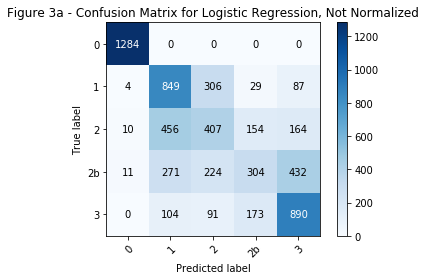

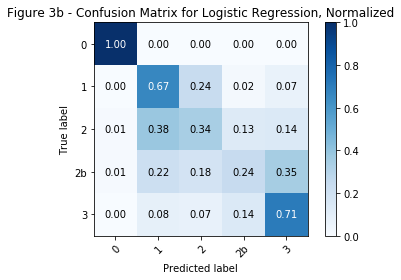

In [42]:
LR = LogisticRegression(solver = 'newton-cg', max_iter = 200, multi_class = 'multinomial').fit(X_train_norm, y_c_train)
yhat_LR = LR.predict(X_test_norm)
    
matrices = [('Figure 3a - Confusion Matrix for Logistic Regression, Not Normalized', None), ('Figure 3b - Confusion Matrix for Logistic Regression, Normalized', True)]

for title, norm in matrices:
    plot_confusion_matrix(y_c_test, yhat_LR, classes = ['0', '1', '2', '2b', '3'], normalize = norm, title = title ) 

### 4. Support Vector Machine

In [43]:
kernel = np.array(['linear', 'poly', 'rbf', 'sigmoid'])
SVM_accu = np.zeros(kernel.size)

for n in range(0, kernel.size):
    SVM = svm.SVC(kernel = kernel[n]).fit(X_train_norm, y_c_train)
    yhat_SVM = SVM.predict(X_test_norm)
    SVM_accu[n] = metrics.accuracy_score(y_c_test, yhat_SVM)
    
SVM_accu

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was pa

array([0.57952, 0.19056, 0.55696, 0.55312])

Linear kernel yielded the greatest accuracy of 0.57952.

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix, without normalization
[[1284    0    0    0    0]
 [   1  947  215   18   94]
 [   7  560  323  108  193]
 [   6  364  199  206  467]
 [   0  149  115  132  862]]
Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [7.84313725e-04 7.42745098e-01 1.68627451e-01 1.41176471e-02
  7.37254902e-02]
 [5.87741394e-03 4.70193115e-01 2.71200672e-01 9.06801008e-02
  1.62048699e-01]
 [4.83091787e-03 2.93075684e-01 1.60225443e-01 1.65861514e-01
  3.76006441e-01]
 [0.00000000e+00 1.18441971e-01 9.14149444e-02 1.04928458e-01
  6.85214626e-01]]


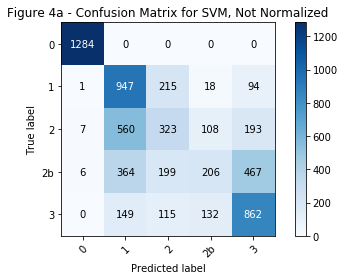

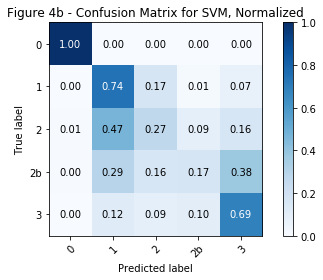

In [44]:
SVM = svm.SVC(kernel = 'linear').fit(X_train_norm, y_c_train)
yhat_SVM = SVM.predict(X_test_norm)
    
matrices = [('Figure 4a - Confusion Matrix for SVM, Not Normalized', None), ('Figure 4b - Confusion Matrix for SVM, Normalized', True)]

for title, norm in matrices:
    plot_confusion_matrix(y_c_test, yhat_SVM, classes = ['0', '1', '2', '2b', '3'], normalize = norm, title = title ) 

## 4.1 Accuracy Evaluation

In [41]:
df_proba = pd.DataFrame(LR.predict_proba(X_test_norm), columns = ['0', '1', '2', '2b', '3'])
df_proba.head()

,0,1,2,2b,3
0,0.995012,0.000618,0.004303,0.000067,2.438342e-07
1,0.000308,0.179885,0.250355,0.250104,3.193486e-01
2,0.000763,0.232406,0.327240,0.249265,1.903263e-01
3,0.820739,0.006342,0.059743,0.074334,3.884258e-02
4,0.024196,0.167062,0.263306,0.249253,2.961826e-01


In [48]:
df_metrics = pd.DataFrame(columns = ['Jaccard Similarity Score', 'F1 Score', 'Log Loss'], 
                          index = ['K-Nearest Neighbors', 'Decision Tree Classifier', 'Logistic Regression', 'SVM'])
df_metrics

,Jaccard Similarity Score,F1 Score,Log Loss
K-Nearest Neighbors,NaN,NaN,NaN
Decision Tree Classifier,NaN,NaN,NaN
Logistic Regression,NaN,NaN,NaN
SVM,NaN,NaN,NaN


In [50]:
print(yhat.shape)
print(pred.shape)
print(yhat_LR.shape)
print(yhat_SVM.shape)
print(y_c_test.shape)

(6250,)
(6250,)
(6250,)
(6250,)
(6250, 1)


In [51]:
df_metrics.loc['K-Nearest Neighbors', 'Jaccard Similarity Score'] = jaccard_similarity_score(y_c_test, yhat)
df_metrics.loc['K-Nearest Neighbors', 'F1 Score'] = f1_score(y_c_test, yhat, average = 'weighted')

df_metrics.loc['Decision Tree Classifier' , 'Jaccard Similarity Score'] = jaccard_similarity_score(y_c_test, pred)
df_metrics.loc['Decision Tree Classifier' , 'F1 Score'] = f1_score(y_c_test, pred, average = 'weighted')

df_metrics.loc['Logistic Regression' , 'Jaccard Similarity Score'] = jaccard_similarity_score(y_c_test, yhat_LR)
df_metrics.loc['Logistic Regression' , 'F1 Score'] = f1_score(y_c_test, yhat_LR, average = 'weighted')
df_metrics.loc['Logistic Regression' , 'Log Loss'] = log_loss(y_c_test, LR.predict_proba(X_test_norm))

df_metrics.loc['SVM' , 'Jaccard Similarity Score'] = jaccard_similarity_score(y_c_test, yhat_SVM)
df_metrics.loc['SVM' , 'F1 Score'] = f1_score(y_c_test, yhat_SVM, average = 'weighted')

df_metrics

,Jaccard Similarity Score,F1 Score,Log Loss
K-Nearest Neighbors,0.6312,0.613546,NaN
Decision Tree Classifier,0.64928,0.636947,NaN
Logistic Regression,0.59744,0.580664,0.901623
SVM,0.57952,0.550574,NaN


In [52]:
df_metrics.fillna(0, inplace = True)
df_metrics

,Jaccard Similarity Score,F1 Score,Log Loss
K-Nearest Neighbors,0.63120,0.613546,0.000000
Decision Tree Classifier,0.64928,0.636947,0.000000
Logistic Regression,0.59744,0.580664,0.901623
SVM,0.57952,0.550574,0.000000


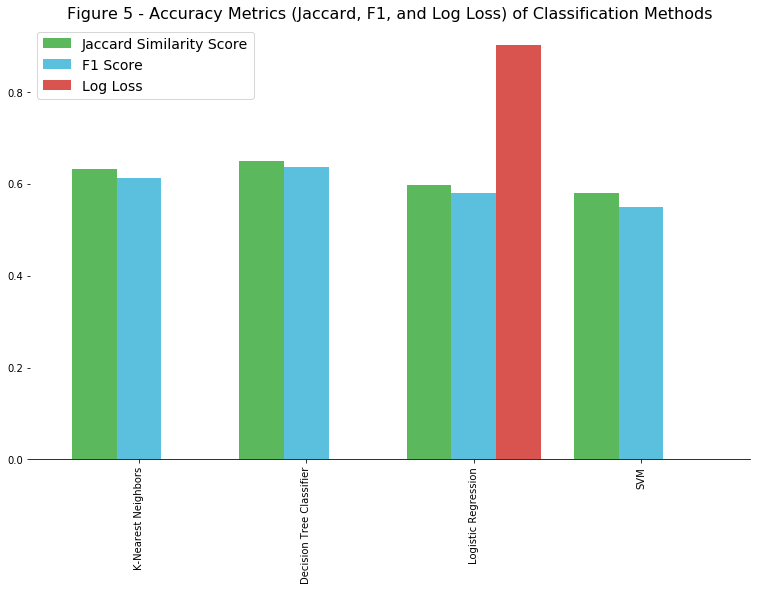

In [59]:
ax = df_metrics.plot(kind = 'bar', figsize= (12.9, 8), width = 0.8, color = ['#5cb85c','#5bc0de','#d9534f'])

ax.legend(fontsize = 14)
ax.set_title('Figure 5 - Accuracy Metrics (Jaccard, F1, and Log Loss) of Classification Methods' , fontsize = 16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)